in this notebook we:
* setup neptune reporting following https://medium.com/neptune-ai/track-and-organize-fastai-experimentation-process-in-neptune-78ec8d6b18b0

In [23]:
from pathlib import Path
import json
import logging

import numpy as np
import pandas as pd

from fastai.vision import *

import os

import neptune
from neptunecontrib.monitoring.fastai import NeptuneMonitor

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import configparser

from functions import *

In [24]:
logging.basicConfig(level=logging.INFO)

In [25]:
PATH_TO_IMG = Path("/data/Gabon_trainingData")

PATH_TO_MAIN = Path("/home/jupyter/")
PATH_TO_TRAIN_DF = PATH_TO_MAIN / "inspect_data_split_validation"
PATH_TO_MODELS = PATH_TO_MAIN / "training" / "saved_models"
PATH_TO_CONFIG = PATH_TO_MAIN / "config"

CONFIG = configparser.ConfigParser()
CONFIG.read(PATH_TO_CONFIG / "neptune.ini")

['/home/jupyter/config/neptune.ini']

In [26]:
# ! pip install neptune-client neptune-contrib

In [27]:
neptune.init(project_qualified_name='appsilon/gabon-wildlife', 
            api_token=CONFIG["neptune"]["NEPTUNE_API_TOKEN"])

Project(appsilon/gabon-wildlife)

In [28]:
df = pd.read_csv(PATH_TO_TRAIN_DF / "train_valid_df.csv")

classes = df.species.unique()
print(len(classes)) # no Blank and no "Mammal_Other"
classes

28


array(['Human', 'Blank', 'Elephant_African', 'Hog_Red_River', 'Buffalo_African', 'Leopard_African', 'Monkey',
       'Duiker_Red', 'Civet_African_Palm', 'Squirrel', 'Duiker_Blue', 'Bird', 'Mongoose_Black_Footed', 'Rodent',
       'Duiker_Yellow_Backed', 'Genet', 'Chimpanzee', 'Gorilla', 'Mongoose', 'Porcupine_Brush_Tailed', 'Pangolin',
       'Mandrillus', 'Chevrotain_Water', 'Cat_Golden', 'Rat_Giant', 'Guineafowl_Crested', 'Guineafowl_Black',
       'Rail_Nkulengu'], dtype=object)

In [29]:
len(df.uniqueName)

347120

In [31]:
data = get_training_data(df, (384 // 4, 512 // 4)) #, partial_pct=0.01)

In [20]:
# data.show_batch()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
CPU times: user 8.53 s, sys: 1.84 s, total: 10.4 s
Wall time: 8min 39s


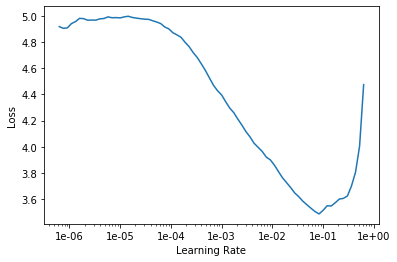

In [32]:
%%time
learn = get_initial_learner(data)
run_find_lr(learn, "stage1-1epochs-96_128-01_full_data")

In [33]:
%%time
learn = get_initial_learner(data)

initial_lr = 0.01
with neptune.create_experiment(params = {"test_param": 314,
                                        "initial_lr": 0.01}): 
    learn.callbacks.append(NeptuneMonitor())

    run_training(learn, "stage1-1epochs-96_128-01_full_data", lr=initial_lr, n_epochs=1)

https://ui.neptune.ai/appsilon/gabon-wildlife/e/GAB-1


INFO:root:running training stage1-1epochs-96_128-01_full_data


epoch,train_loss,valid_loss,accuracy,time
0,0.835469,1.632073,0.534794,4:05:57


INFO:root:finished training stage1-1epochs-96_128-01_full_data


RecursionError: maximum recursion depth exceeded

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

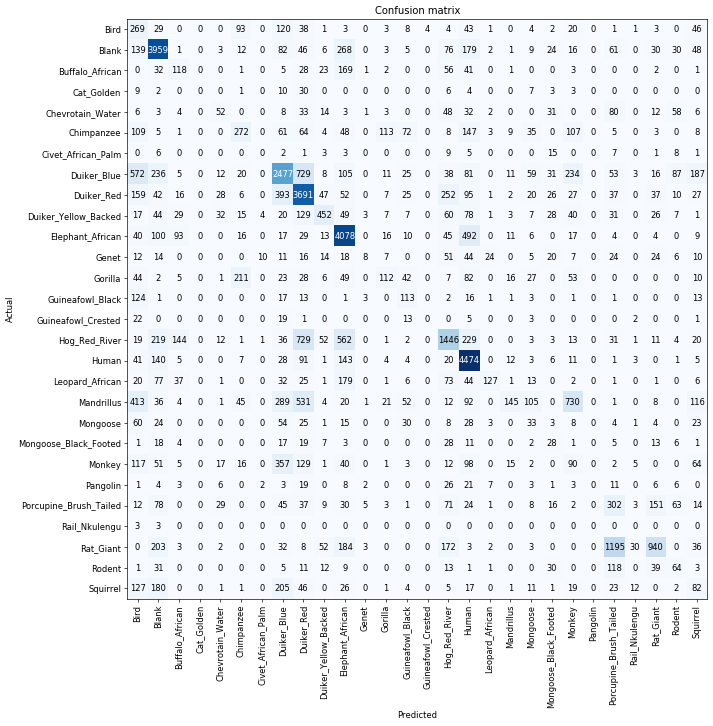

In [35]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)